In [1]:
# Import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')#ignore minor warnings

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('CreditScoring.csv.txt')
df.columns = df.columns.str.lower()

In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [5]:
#Prepare the numerical variables:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

In [6]:
#Remove clients with unknown default status
df = df[df['status'] != 'unk'].reset_index(drop=True)

In [7]:
#create target variable
df['default'] = (df.status == 'default').astype(int)
del df['status']
df['default']

0       0
1       0
2       1
3       0
4       0
       ..
4449    1
4450    0
4451    1
4452    0
4453    0
Name: default, Length: 4454, dtype: int32

In [8]:
#all columsn
df.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'],
      dtype='object')

In [9]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['home', 'marital', 'records', 'job']

In [10]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)
#numerical.pop() #remove default which was last in list
numerical.remove('default')
numerical

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

In [18]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)#they use random state 42#does this matter
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['default'].values
y_val = df_val['default'].values
y_test = df_test['default'].values

del df_train['default']
del df_val['default']
del df_test['default']

In [19]:
#not sure how this is part of any questions

In [20]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[numerical +categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
val_dict = df_val[numerical+categorical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8047138047138047

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.8477658032394276

In [16]:
df

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020,1
4450,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263,0
4451,0,owner,24,37,married,no,partime,60,90,3500,0,500,963,1
4452,0,rent,48,23,single,no,freelance,49,140,0,0,550,550,0


In [25]:
newdf = df.copy()
newdf = newdf[['seniority', 'income', 'assets', 'records', 'job', 'home','default']]
newdf

,seniority,income,assets,records,job,home,default
0,9,129,0,no,freelance,rent,0
1,17,131,0,no,fixed,rent,0
2,10,200,3000,yes,freelance,owner,1
3,0,182,2500,no,fixed,rent,0
4,0,107,0,no,fixed,rent,0
...,...,...,...,...,...,...,...
4449,1,92,0,no,fixed,rent,1
4450,22,75,3000,no,fixed,owner,0
4451,0,90,3500,no,partime,owner,1
4452,0,140,0,no,freelance,rent,0


In [26]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(newdf, test_size=0.2, random_state=1)#they use random state 42#does this matter
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['default'].values
y_val = df_val['default'].values
y_test = df_test['default'].values

del df_train['default']
del df_val['default']
del df_test['default']

In [27]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [28]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.8120879813449298

In [30]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [31]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [32]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [33]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[581,  64],
       [132, 114]])

In [34]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.15, 0.13]])

In [35]:
p = tp / (tp + fp)
p

0.6404494382022472

In [36]:
r = tp / (tp + fn)
r

0.4634146341463415

In [42]:
np.arange(0, 1, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [46]:
scores = []

thresholds = np.arange(0, 1, 0.01)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp) #precision
    r = tp / (tp + fn) #recall
    
    
    scores.append((t, tp, fp, fn, tn, p, r))

In [47]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn','p','r']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

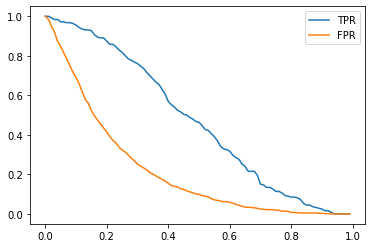

In [48]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

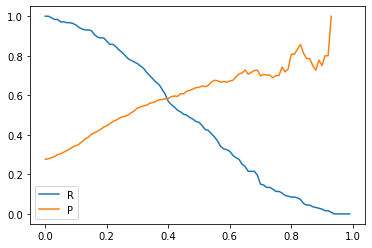

In [49]:
plt.plot(df_scores.threshold, df_scores['r'], label='R')
plt.plot(df_scores.threshold, df_scores['p'], label='P')
plt.legend()

In [51]:
df_scores

,threshold,tp,fp,fn,tn,p,r,tpr,fpr
0,0.00,246,645,0,0,0.276094,1.00000,1.00000,1.000000
1,0.01,246,635,0,10,0.279228,1.00000,1.00000,0.984496
2,0.02,244,613,2,32,0.284714,0.99187,0.99187,0.950388
3,0.03,242,593,4,52,0.289820,0.98374,0.98374,0.919380
4,0.04,242,563,4,82,0.300621,0.98374,0.98374,0.872868
...,...,...,...,...,...,...,...,...,...
95,0.95,0,0,246,645,NaN,0.00000,0.00000,0.000000
96,0.96,0,0,246,645,NaN,0.00000,0.00000,0.000000
97,0.97,0,0,246,645,NaN,0.00000,0.00000,0.000000
98,0.98,0,0,246,645,NaN,0.00000,0.00000,0.000000


In [ ]:
dfpr = df_scores.copy()
dfpr = dfpr[['r','p']]
dfpr

In [63]:
dfpr['f'] = 2 * (dfpr['p'] * dfpr['r']) / (dfpr['p'] + dfpr['r'])

dfpr.idxmax(axis = 0)

r     0
p    93
f    30
dtype: int64

In [66]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[['seniority', 'income', 'assets', 'records', 'job', 'home']].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver = 'liblinear',C = C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [67]:
dv, model = train(df_train, y_train, C=0.001)

In [68]:
#predictions
def predict(df, dv, model):
    dicts = df[['seniority', 'income', 'assets', 'records', 'job', 'home']].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [69]:
y_pred = predict(df_val, dv, model)

In [70]:
from sklearn.model_selection import KFold

In [82]:
#an iterator to see progress
from tqdm.auto import tqdm

In [84]:
n_splits = 5

for C in tqdm ([0.01, 0.1, 1, 10]):#
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s =>  %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 =>  0.809 +- 0.013
C=0.1 =>  0.812 +- 0.013
C=1 =>  0.812 +- 0.014
C=10 =>  0.814 +- 0.015


In [78]:
scores

[0.8256014256014257,
 0.825427566891127,
 0.7892586687923474,
 0.8249125496207208,
 0.8054980087218927]

In [79]:
dv, model = train(df_full_train, df_full_train.default.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.775937855707055